## To install pyspark into your JuypterHub Azure/Biosim type the following:
#### \$pip install --user pyspark
#### \$pip install --user findspark

## Before you run any of this code, ensure you have a terminal open and have started spark by typing the command $pyspark into the terminal

In [1]:
# Import to find Spark on PC
import findspark
findspark.init()
findspark.find()

# Importing pyspark and Spark Session
import pyspark
from pyspark.sql import SparkSession

# Import garbage collector for deleting dataframes
import gc

# Creating a sprark session
spark = SparkSession.builder.master("local[1]").appName("ECG").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/11/08 10:53:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/11/08 10:53:55 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
# Import data into dataframe
df = spark.read.csv("ecg.csv", header=False, inferSchema=True)

In [3]:
df.schema

StructType([StructField('_c0', DoubleType(), True), StructField('_c1', DoubleType(), True), StructField('_c2', DoubleType(), True), StructField('_c3', DoubleType(), True), StructField('_c4', DoubleType(), True), StructField('_c5', DoubleType(), True), StructField('_c6', DoubleType(), True), StructField('_c7', DoubleType(), True), StructField('_c8', DoubleType(), True), StructField('_c9', DoubleType(), True), StructField('_c10', DoubleType(), True), StructField('_c11', DoubleType(), True), StructField('_c12', DoubleType(), True), StructField('_c13', DoubleType(), True), StructField('_c14', DoubleType(), True), StructField('_c15', DoubleType(), True), StructField('_c16', DoubleType(), True), StructField('_c17', DoubleType(), True), StructField('_c18', DoubleType(), True), StructField('_c19', DoubleType(), True), StructField('_c20', DoubleType(), True), StructField('_c21', DoubleType(), True), StructField('_c22', DoubleType(), True), StructField('_c23', DoubleType(), True), StructField('_

In [4]:
# Change name of last column to label
df = df.withColumnRenamed(df.columns[-1], "label")

In [5]:
# Showing the different label counts
df.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1| 2919|
|    0| 2079|
+-----+-----+



In [6]:
# Creating a new data frame with only the 1's in the label
df2 = df.filter(df['label'] == '1')

In [7]:
# Showing the dataframe label count
df2.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1| 2919|
+-----+-----+



In [8]:
# Showing that the original dataframe didn't change
df.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1| 2919|
|    0| 2079|
+-----+-----+



In [9]:
# Overwriting of dataframe with only data that has 0 as the label
df = df.filter(df['label'] == '0')

In [10]:
# Showing new dataframe with only 0 in labels
df.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    0| 2079|
+-----+-----+



In [11]:
# Seeded random split to get data with label of 1 as close to the number of data with 0 as possible (2079)
df3, df4 = df2.randomSplit([0.30, 0.70], seed=1000)

In [12]:
# Showing the number that should be removed to have the classification ration to nearly 50% exactly
df3.groupBy('label').count().show()

23/11/08 10:54:03 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-----+-----+
|label|count|
+-----+-----+
|    1|  844|
+-----+-----+



In [13]:
# Showing the number that should be added to the original dataframe to restore data
df4.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1| 2075|
+-----+-----+



In [14]:
# Using the union method to add the dataframe with only 1's in it to the dataframe that has only 0's
df = df.union(df4)

In [15]:
# New dataframe that will be used for the machine learning models that have a classification percentage very close to 50%
df.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    0| 2079|
|    1| 2075|
+-----+-----+



In [16]:
# Showing percentage of 1's in the dataframe
print("Percentage of 1's: ", (2075 / (2079 + 2075)) * 100)

Percentage of 1's:  49.951853635050554


In [17]:
# Showing percentage of 0's in the dataframe
print("Percentage of 0's: ", (2079 / (2079 + 2075)) * 100)

Percentage of 0's:  50.04814636494944


In [18]:
# Deleting unused dataframes
del df2
del df3
del df4

# Using the garbage collector to free the memory
gc.collect()

118

In [ ]:
# Showing the dataframe has been removed
#df2.count()

In [ ]:
# Showing the dataframe has been removed
#df3.count()

In [ ]:
# Showing the dataframe has been removed
#df4.count()

In [19]:
# Showing the infered schema of the dataframe
df.schema

StructType([StructField('_c0', DoubleType(), True), StructField('_c1', DoubleType(), True), StructField('_c2', DoubleType(), True), StructField('_c3', DoubleType(), True), StructField('_c4', DoubleType(), True), StructField('_c5', DoubleType(), True), StructField('_c6', DoubleType(), True), StructField('_c7', DoubleType(), True), StructField('_c8', DoubleType(), True), StructField('_c9', DoubleType(), True), StructField('_c10', DoubleType(), True), StructField('_c11', DoubleType(), True), StructField('_c12', DoubleType(), True), StructField('_c13', DoubleType(), True), StructField('_c14', DoubleType(), True), StructField('_c15', DoubleType(), True), StructField('_c16', DoubleType(), True), StructField('_c17', DoubleType(), True), StructField('_c18', DoubleType(), True), StructField('_c19', DoubleType(), True), StructField('_c20', DoubleType(), True), StructField('_c21', DoubleType(), True), StructField('_c22', DoubleType(), True), StructField('_c23', DoubleType(), True), StructField('_

In [20]:
# Showing only the first row of the dataframe
df.show(1)

+------------+-----------+-----------+----------+----------+----------+----------+---------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+---------+----------+----------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+---------+----------+----------+----------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+---------+----------+---------+----------+----------+----------+----------+----------+----------+-----

In [21]:
# Creating a list of all column names that are features (minus the last column which is the label)
features_list = df.columns[:-1]

In [22]:
# Showing the list of features we just created
features_list

['_c0',
 '_c1',
 '_c2',
 '_c3',
 '_c4',
 '_c5',
 '_c6',
 '_c7',
 '_c8',
 '_c9',
 '_c10',
 '_c11',
 '_c12',
 '_c13',
 '_c14',
 '_c15',
 '_c16',
 '_c17',
 '_c18',
 '_c19',
 '_c20',
 '_c21',
 '_c22',
 '_c23',
 '_c24',
 '_c25',
 '_c26',
 '_c27',
 '_c28',
 '_c29',
 '_c30',
 '_c31',
 '_c32',
 '_c33',
 '_c34',
 '_c35',
 '_c36',
 '_c37',
 '_c38',
 '_c39',
 '_c40',
 '_c41',
 '_c42',
 '_c43',
 '_c44',
 '_c45',
 '_c46',
 '_c47',
 '_c48',
 '_c49',
 '_c50',
 '_c51',
 '_c52',
 '_c53',
 '_c54',
 '_c55',
 '_c56',
 '_c57',
 '_c58',
 '_c59',
 '_c60',
 '_c61',
 '_c62',
 '_c63',
 '_c64',
 '_c65',
 '_c66',
 '_c67',
 '_c68',
 '_c69',
 '_c70',
 '_c71',
 '_c72',
 '_c73',
 '_c74',
 '_c75',
 '_c76',
 '_c77',
 '_c78',
 '_c79',
 '_c80',
 '_c81',
 '_c82',
 '_c83',
 '_c84',
 '_c85',
 '_c86',
 '_c87',
 '_c88',
 '_c89',
 '_c90',
 '_c91',
 '_c92',
 '_c93',
 '_c94',
 '_c95',
 '_c96',
 '_c97',
 '_c98',
 '_c99',
 '_c100',
 '_c101',
 '_c102',
 '_c103',
 '_c104',
 '_c105',
 '_c106',
 '_c107',
 '_c108',
 '_c109',
 '_c110',


In [23]:
# Using the .take() method to show the first row of the dataframe to illustrate the difference in the .take() and .show() methods
df.take(1)

[Row(_c0=-0.032245388, _c1=-0.54504988, _c2=-0.82233951, _c3=-1.6050845, _c4=-1.8057748, _c5=-2.0080666, _c6=-2.2339748, _c7=-2.191458, _c8=-2.0580713, _c9=-1.8808487, _c10=-1.5980847, _c11=-1.0734666, _c12=-0.60601763, _c13=-0.40062774, _c14=-0.30974032, _c15=-0.27599315, _c16=-0.16190422, _c17=0.10850521, _c18=0.30977527, _c19=0.41252896, _c20=0.53814803, _c21=0.54247379, _c22=0.42785112, _c23=0.37815942, _c24=0.36188738, _c25=0.37976272, _c26=0.45375055, _c27=0.5483923, _c28=0.67794169, _c29=0.66825595, _c30=0.4131611, _c31=0.22767328, _c32=0.27982432, _c33=0.35898388, _c34=0.40398305, _c35=0.43035215, _c36=0.40867432, _c37=0.42049766, _c38=0.42107193, _c39=0.32161806, _c40=0.22971489, _c41=0.20655718, _c42=0.22594547, _c43=0.34068889, _c44=0.44956444, _c45=0.40496562, _c46=0.30956912, _c47=0.24239092, _c48=0.17865089, _c49=0.18501601, _c50=0.33981574, _c51=0.51298385, _c52=0.47234082, _c53=0.24335581, _c54=0.082250646, _c55=0.041823061, _c56=0.04329214, _c57=0.16040296, _c58=0.2645

In [24]:
# Importing the vector assembler module from pyspark
from pyspark.ml.feature import VectorAssembler

# Using the VectorAssembler method to create a vector of features
feature_vector_assembler = VectorAssembler(inputCols=features_list,
                                           outputCol="feature_vector")

# Transforming the vector and mounting it to the dataframe
df = feature_vector_assembler.transform(df)

# Showing the frist row of the dataframe to illustrate that the feature vector has been added to the dataframe
df.take(1)

[Row(_c0=-0.032245388, _c1=-0.54504988, _c2=-0.82233951, _c3=-1.6050845, _c4=-1.8057748, _c5=-2.0080666, _c6=-2.2339748, _c7=-2.191458, _c8=-2.0580713, _c9=-1.8808487, _c10=-1.5980847, _c11=-1.0734666, _c12=-0.60601763, _c13=-0.40062774, _c14=-0.30974032, _c15=-0.27599315, _c16=-0.16190422, _c17=0.10850521, _c18=0.30977527, _c19=0.41252896, _c20=0.53814803, _c21=0.54247379, _c22=0.42785112, _c23=0.37815942, _c24=0.36188738, _c25=0.37976272, _c26=0.45375055, _c27=0.5483923, _c28=0.67794169, _c29=0.66825595, _c30=0.4131611, _c31=0.22767328, _c32=0.27982432, _c33=0.35898388, _c34=0.40398305, _c35=0.43035215, _c36=0.40867432, _c37=0.42049766, _c38=0.42107193, _c39=0.32161806, _c40=0.22971489, _c41=0.20655718, _c42=0.22594547, _c43=0.34068889, _c44=0.44956444, _c45=0.40496562, _c46=0.30956912, _c47=0.24239092, _c48=0.17865089, _c49=0.18501601, _c50=0.33981574, _c51=0.51298385, _c52=0.47234082, _c53=0.24335581, _c54=0.082250646, _c55=0.041823061, _c56=0.04329214, _c57=0.16040296, _c58=0.2645

In [25]:
# Showing the first three rows of the feature vector column suing the .show() method
# By default the method truncates the data within the column
df.select("feature_vector").show(3)

+--------------------+
|      feature_vector|
+--------------------+
|[-0.032245388,-0....|
|[-0.003376902,-0....|
|[0.19598933,-0.22...|
+--------------------+
only showing top 3 rows



In [26]:
# Showing the first two rows of the feature vector column using the .take() method
# By default the method expands the column with precission lost only during displaying
df.select("feature_vector").take(2)

[Row(feature_vector=DenseVector([-0.0322, -0.545, -0.8223, -1.6051, -1.8058, -2.0081, -2.234, -2.1915, -2.0581, -1.8808, -1.5981, -1.0735, -0.606, -0.4006, -0.3097, -0.276, -0.1619, 0.1085, 0.3098, 0.4125, 0.5381, 0.5425, 0.4279, 0.3782, 0.3619, 0.3798, 0.4538, 0.5484, 0.6779, 0.6683, 0.4132, 0.2277, 0.2798, 0.359, 0.404, 0.4304, 0.4087, 0.4205, 0.4211, 0.3216, 0.2297, 0.2066, 0.2259, 0.3407, 0.4496, 0.405, 0.3096, 0.2424, 0.1787, 0.185, 0.3398, 0.513, 0.4723, 0.2434, 0.0823, 0.0418, 0.0433, 0.1604, 0.2645, 0.211, 0.2203, 0.3174, 0.3137, 0.3109, 0.385, 0.3678, 0.2985, 0.3175, 0.327, 0.2988, 0.3674, 0.4789, 0.5114, 0.4984, 0.4913, 0.5007, 0.4936, 0.5387, 0.6315, 0.5785, 0.5342, 0.6395, 0.6751, 0.5978, 0.4883, 0.3969, 0.4217, 0.51, 0.5546, 0.5963, 0.5714, 0.4584, 0.4473, 0.5097, 0.5308, 0.5132, 0.4655, 0.4964, 0.6066, 0.666, 0.6292, 0.5455, 0.5454, 0.6096, 0.5978, 0.5726, 0.6046, 0.5709, 0.4886, 0.4889, 0.5194, 0.5513, 0.6117, 0.6143, 0.5503, 0.4876, 0.4152, 0.399, 0.5346, 0.6644, 0.6345

In [27]:
# Showing first row of the feature vector with .show() method turning off truncate so you can see the precision is saved
df.select("feature_vector").show(1, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [28]:
# Standardizing the data
from pyspark.ml.feature import StandardScaler

# Creating a scalar with the input column being the feature vector and naming the output column
# and choosing the options of using the standard deviation and mean to normalize the data
scaler = StandardScaler(inputCol="feature_vector",
                        outputCol="scaled_feature_vector",
                        withStd=True, withMean=True)

# Fitting the data to the scalar
scaler = scaler.fit(df)

# Transforming and mounting the scaled data to the dataframe
df = scaler.transform(df)

# Showing the frist row of the dataframe to illustrate that the scale feature vector has been added to the dataframe
df.take(1)

[Row(_c0=-0.032245388, _c1=-0.54504988, _c2=-0.82233951, _c3=-1.6050845, _c4=-1.8057748, _c5=-2.0080666, _c6=-2.2339748, _c7=-2.191458, _c8=-2.0580713, _c9=-1.8808487, _c10=-1.5980847, _c11=-1.0734666, _c12=-0.60601763, _c13=-0.40062774, _c14=-0.30974032, _c15=-0.27599315, _c16=-0.16190422, _c17=0.10850521, _c18=0.30977527, _c19=0.41252896, _c20=0.53814803, _c21=0.54247379, _c22=0.42785112, _c23=0.37815942, _c24=0.36188738, _c25=0.37976272, _c26=0.45375055, _c27=0.5483923, _c28=0.67794169, _c29=0.66825595, _c30=0.4131611, _c31=0.22767328, _c32=0.27982432, _c33=0.35898388, _c34=0.40398305, _c35=0.43035215, _c36=0.40867432, _c37=0.42049766, _c38=0.42107193, _c39=0.32161806, _c40=0.22971489, _c41=0.20655718, _c42=0.22594547, _c43=0.34068889, _c44=0.44956444, _c45=0.40496562, _c46=0.30956912, _c47=0.24239092, _c48=0.17865089, _c49=0.18501601, _c50=0.33981574, _c51=0.51298385, _c52=0.47234082, _c53=0.24335581, _c54=0.082250646, _c55=0.041823061, _c56=0.04329214, _c57=0.16040296, _c58=0.2645

In [29]:
# Showing the first three rows of the scaled feature vector column suing the .show() method
# By default the method truncates the data within the column
df.select("scaled_feature_vector").show(3)

+---------------------+
|scaled_feature_vector|
+---------------------+
| [0.17704348342429...|
| [0.20291272241540...|
| [0.38156610598271...|
+---------------------+
only showing top 3 rows



In [30]:
# Showing the first two rows of the scaled feature vector column using the .take() method
# By default the method expands the column with precission lost only during displaying
df.select("scaled_feature_vector").take(2)

[Row(scaled_feature_vector=DenseVector([0.177, 0.6957, 1.0789, 1.0121, 1.0779, 0.8498, 0.0493, -0.5551, -0.9178, -1.3186, -1.5712, -1.1888, -0.5685, -0.3375, -0.3397, -0.4475, -0.2973, 0.2779, 0.7271, 0.9605, 1.2519, 1.2629, 1.009, 0.9159, 0.8961, 0.9385, 1.1015, 1.315, 1.5799, 1.5609, 1.0779, 0.7467, 0.8674, 1.0251, 1.1187, 1.1809, 1.1602, 1.2031, 1.2172, 1.0461, 0.8678, 0.8066, 0.8402, 1.1139, 1.3997, 1.3026, 1.0258, 0.7975, 0.5494, 0.5422, 1.0969, 1.7712, 1.6277, 0.7384, 0.0887, -0.1045, -0.1238, 0.343, 0.7341, 0.4682, 0.4607, 0.8048, 0.7208, 0.6423, 0.8645, 0.7094, 0.3265, 0.2918, 0.2066, -0.0215, 0.1479, 0.4882, 0.5238, 0.3853, 0.2878, 0.2637, 0.192, 0.3527, 0.7299, 0.4939, 0.2972, 0.778, 0.9405, 0.5897, 0.096, -0.2969, -0.1755, 0.2058, 0.3935, 0.5747, 0.4615, -0.002, -0.0748, 0.1025, 0.0829, -0.1076, -0.4115, -0.4572, -0.3134, -0.3242, -0.5405, -0.7975, -0.8656, -0.8145, -0.8733, -0.9393, -0.8748, -0.8738, -0.9227, -0.7518, -0.4286, -0.0805, 0.2683, 0.4359, 0.4365, 0.419, 0.3593,

In [31]:
# Showing first row of the feature vector with .show() method turning off truncate so you can see the precision is saved
df.select("scaled_feature_vector").show(1, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [32]:
# Showing what the final df should look like with the .show() method and truncation turned off
df.select("scaled_feature_vector","label").show(1, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [33]:
# creating a dataframe for the model to fit to
model_df = df.select("scaled_feature_vector","label")
model_df.show(3)

+---------------------+-----+
|scaled_feature_vector|label|
+---------------------+-----+
| [0.17704348342429...|    0|
| [0.20291272241540...|    0|
| [0.38156610598271...|    0|
+---------------------+-----+
only showing top 3 rows



In [34]:
# Splitting the data into training, test, and validation dataframes using a the randomSplit method with a seed to standardize the output sizes across multiple runs of the file
training_df, test_df, validation_df = model_df.randomSplit([0.7, 0.2, 0.1], seed=22)

In [35]:
# Showing the number of rows in the dataframe
training_df.count()

2886

In [36]:
# Showing the number of rows in the dataframe
test_df.count()

826

In [37]:
# Showing the number of rows in the dataframe
validation_df.count()

442

In [38]:
# Showing the total rows across the split dataframes
training_df.count() + test_df.count() + validation_df.count()

4154

In [39]:
# Showing the total rows across the processed dataframe
df.count()

4154

In [40]:
# Showing the total rows across the split dataframes addes up to the original number of rows in the processed dataframe
training_df.count() + test_df.count() + validation_df.count() == df.count()

True

In [41]:
# Importing the Logistic Regression model from pyspark ml library
from pyspark.ml.classification import LogisticRegression

# Fitting the model and storing it to a variable
log_reg = LogisticRegression(featuresCol="scaled_feature_vector", labelCol="label").fit(training_df)

In [42]:
# Showing the model
log_reg

LogisticRegressionModel: uid=LogisticRegression_597eda099ead, numClasses=2, numFeatures=140

In [43]:
# Training the model with the training data and storing the predictions in a variable
train_results = log_reg.evaluate(training_df).predictions

In [44]:
# Showing the training results dataframe
train_results.show()

+---------------------+-----+--------------------+--------------------+----------+
|scaled_feature_vector|label|       rawPrediction|         probability|prediction|
+---------------------+-----+--------------------+--------------------+----------+
| [-4.4072516237687...|    0|[7.31825341824663...|[0.99933711995920...|       0.0|
| [-4.3572698479488...|    0|[21.4274945773605...|[0.99999999950551...|       0.0|
| [-4.0190236826299...|    0|[3.69825745056395...|[0.97583191637601...|       0.0|
| [-2.8835944220220...|    0|[4.86017347457243...|[0.99231044791589...|       0.0|
| [-2.8360915457128...|    0|[8.06234696234792...|[0.99968491310463...|       0.0|
| [-2.8335027835408...|    0|[7.14024424198860...|[0.99920806915475...|       0.0|
| [-2.7892319842859...|    0|[5.56850692058449...|[0.99619833378794...|       0.0|
| [-2.5775205423931...|    0|[4.99283245473161...|[0.99325932995438...|       0.0|
| [-2.2889003089886...|    0|[7.99475542656361...|[0.99966288707554...|       0.0|
| [-

In [45]:
# Testing the model and storing the predictions to a variable
test_results = log_reg.evaluate(test_df).predictions

In [46]:
# Showing the results data
test_results.show()

+---------------------+-----+--------------------+--------------------+----------+
|scaled_feature_vector|label|       rawPrediction|         probability|prediction|
+---------------------+-----+--------------------+--------------------+----------+
| [-3.8142700599364...|    0|[2.85822365450410...|[0.94574222049142...|       0.0|
| [-2.9711010174825...|    0|[14.1684489367212...|[0.99999929738000...|       0.0|
| [-2.4986969504351...|    0|[20.1805709306802...|[0.99999999827936...|       0.0|
| [-2.4751988864036...|    0|[2.9303709259082,...|[0.94932752135160...|       0.0|
| [-2.3738237877482...|    0|[6.65056521054904...|[0.99870837952385...|       0.0|
| [-2.3720989618876...|    0|[-5.2182607147476...|[0.00538755917873...|       1.0|
| [-2.2677990611091...|    0|[10.0888405109567...|[0.99995846117602...|       0.0|
| [-2.2349838189795...|    0|[3.36128107832949...|[0.96647231306004...|       0.0|
| [-2.0174389027581...|    0|[6.46992290034500...|[0.99845305157478...|       0.0|
| [-

In [47]:
# Showing the lables and predictions to see which ones match up and which ones don't
test_results.select(["label", "prediction"]).show(10)

+-----+----------+
|label|prediction|
+-----+----------+
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       1.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
+-----+----------+
only showing top 10 rows



In [48]:
# Finding the number of true positive results
tp = test_results[(test_results.label==1) & (test_results.prediction==1)].count()
tp

408

In [49]:
# Finding the number of true negative results
tn = test_results[(test_results.label==0) & (test_results.prediction==0)].count()
tn

409

In [50]:
# Finding the number of false positive results
fp = test_results[(test_results.label==0) & (test_results.prediction==1)].count()
fp

5

In [51]:
# Finding the number of false negative results
fn = test_results[(test_results.label==1) & (test_results.prediction==0)].count()
fn

4

In [52]:
from pyspark.sql.functions import asc
from pyspark.sql.functions import desc

In [53]:
test_results.groupBy("label", "prediction").count().sort(asc("label"), asc("prediction")).show()

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    0|       0.0|  409|
|    0|       1.0|    5|
|    1|       0.0|    4|
|    1|       1.0|  408|
+-----+----------+-----+



In [54]:
# Finding the accuracy of the model manually
accuracy = float((tp+tn) / test_results.count())
accuracy

0.9891041162227603

In [55]:
# Finding the precision of the model manually (the quality of a positive prediction made by the model)
precision = tp / (tp + fp)
precision

0.9878934624697336

In [56]:
# Percantage of the resluts that were tp or the TPR (True Positive Rate)
recall = float(tn) / (tp + tn)
recall

0.5006119951040392

In [57]:
# Importing multiclass classification evaluator from pyspark
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Save the evalutor to a variable with the resuts input and metric
multi_evaluator = MulticlassClassificationEvaluator(labelCol="label", metricName='accuracy')

# Returns the accuarcy given the test results data
# Showing you can get the accuracy a different way
multi_evaluator.evaluate(test_results)

0.9891041162227603

# Metrics with MulticlassMetrics

In [58]:
from pyspark.mllib.evaluation import MulticlassMetrics

In [59]:
rdd = test_results.select("prediction","label")

In [60]:
rdd.schema

StructType([StructField('prediction', DoubleType(), False), StructField('label', IntegerType(), True)])

In [61]:
rdd = rdd.withColumn("label", rdd["label"].cast('double')) 

In [62]:
rdd.schema

StructType([StructField('prediction', DoubleType(), False), StructField('label', DoubleType(), True)])

In [63]:
rdd = rdd.rdd

In [64]:
rdd = rdd.map(tuple)

In [65]:
metrics = MulticlassMetrics(rdd)

/home/jovyan/.local/lib/python3.11/site-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [66]:
precision = metrics.precision(1.0)
recall = metrics.recall(1.0)
f1Score = metrics.fMeasure(1.0)
print("Summary Stats")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)

Summary Stats
Precision = 0.9878934624697336
Recall = 0.9902912621359223
F1 Score = 0.989090909090909


In [67]:
# Statistics by class
training_rdd = training_df.withColumn("label", training_df["label"].cast('double'))
labels = training_rdd.rdd.map(lambda lp: lp.label).distinct().collect()
for label in sorted(labels):
    print("Class %s precision = %s" % (label, metrics.precision(label)))
    print("Class %s recall = %s" % (label, metrics.recall(label)))
    print("Class %s F1 Measure = %s" % (label, metrics.fMeasure(label, beta=1.0)))

Class 0.0 precision = 0.9903147699757869
Class 0.0 recall = 0.9879227053140096
Class 0.0 F1 Measure = 0.9891172914147521
Class 1.0 precision = 0.9878934624697336
Class 1.0 recall = 0.9902912621359223
Class 1.0 F1 Measure = 0.989090909090909


In [68]:
# Weighted stats
print("Weighted recall = %s" % metrics.weightedRecall)
print("Weighted precision = %s" % metrics.weightedPrecision)
print("Weighted F(1) Score = %s" % metrics.weightedFMeasure())
print("Weighted F(0.5) Score = %s" % metrics.weightedFMeasure(beta=0.5))
print("Weighted false positive rate = %s" % metrics.weightedFalsePositiveRate)

Weighted recall = 0.9891041162227603
Weighted precision = 0.9891070475877797
Weighted F(1) Score = 0.98910413219269
Weighted F(0.5) Score = 0.9891055334990421
Weighted false positive rate = 0.010890148772828298


# Save the model

In [ ]:
log_reg.save("log_reg_model.model")

In [ ]:
from pyspark.ml.classification import LogisticRegressionModel

sameModel = LogisticRegressionModel.load("./log_reg_model.model")

sameModel

In [ ]:
validation_results = sameModel.evaluate(validation_df).predictions

In [ ]:
validation_results.show()

In [ ]:
multi_evaluator.evaluate(validation_results)

# Plot confusion matrix

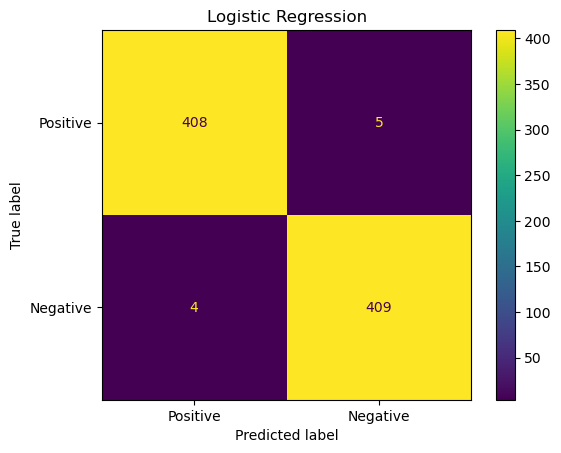

In [69]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = numpy.array([[tp, fp], [fn, tn]])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Positive', 'Negative'])
cm_display.plot()
plt.title("Logistic Regression")
plt.savefig('./Log_Reg_CM.png')
plt.show()

# SVM

In [ ]:
from pyspark.ml.classification import LinearSVC

lsvc = LinearSVC(maxIter=10, regParam=0.1)

# Fit the model
lsvcModel = lsvc(featuresCol="scaled_feature_vector", labelCol="label").fit(training_df)

# Print the coefficients and intercept for linearsSVC
print("Coefficients: " + str(lsvcModel.coefficients))
print("Intercept: " + str(lsvcModel.intercept))

# Random Forest Tree

In [70]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Train a RandomForest model.
rf_model = RandomForestClassifier(labelCol="label", \
                            featuresCol="scaled_feature_vector", \
                            numTrees=12).fit(training_df)

In [71]:
# Make predictions.
#predictions = rf_model.transform(test_df)
test_results_RFT = log_reg.evaluate(test_df).predictions

In [72]:
# Select example rows to display.
test_results_RFT.select("scaled_feature_vector", "label", "prediction").show(10)

+---------------------+-----+----------+
|scaled_feature_vector|label|prediction|
+---------------------+-----+----------+
| [-3.8142700599364...|    0|       0.0|
| [-2.9711010174825...|    0|       0.0|
| [-2.4986969504351...|    0|       0.0|
| [-2.4751988864036...|    0|       0.0|
| [-2.3738237877482...|    0|       0.0|
| [-2.3720989618876...|    0|       1.0|
| [-2.2677990611091...|    0|       0.0|
| [-2.2349838189795...|    0|       0.0|
| [-2.0174389027581...|    0|       0.0|
| [-1.9820193062026...|    0|       0.0|
+---------------------+-----+----------+
only showing top 10 rows



In [73]:
# Save the evalutor to a variable with the resuts input and metric
multi_evaluator_RFT = MulticlassClassificationEvaluator(labelCol="label", metricName='accuracy')

In [74]:
multi_evaluator_RFT.evaluate(test_results_RFT)

0.9891041162227603

In [75]:
validation_results_RFT = rf_model.evaluate(validation_df).predictions

In [76]:
multi_evaluator_RFT.evaluate(validation_results_RFT)

0.9886877828054299